In [35]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

from sklearn.compose import ColumnTransformer

from scipy import stats
import numpy as np

In [36]:
# Cargar el csv
file_path = 'cars.csv'
df = pd.read_csv(file_path, sep=';')
df.head()

,CODE,PRODUCTO,TIPO_CARROCERIA,COMBUSTIBLE,Potencia_,TRANS,FORMA_PAGO,ESTADO_CIVIL,GENERO,OcupaciOn,...,REV_Garantia,Averia_grave,QUEJA_CAC,EDAD_COCHE,COSTE_VENTA,km_anno,Mas_1_coche,Revisiones,Edad Cliente,Tiempo
0,CLI1,A,TIPO1,FUEL 1,Baja,M,Contado,CASADO,M,Empresa,...,NO DATA,Averia muy grave,SI,2.08,2892,0,0,2,18,0
1,CLI2,A,TIPO1,FUEL 1,Baja,M,Contado,CASADO,F,Empresa,...,SI,No,NO,2.45,1376,7187,0,2,53,0
2,CLI3,A,TIPO1,FUEL 1,Baja,M,Otros,CASADO,M,Empresa,...,NO DATA,No,NO,2.51,1376,0,1,4,21,3
3,CLI4,A,TIPO1,FUEL 1,Baja,M,Financiera Marca,CASADO,F,Empresa,...,SI,Averia muy grave,SI,2.43,2015,7256,1,4,48,5
4,CLI5,A,TIPO1,FUEL 1,Baja,M,Financiera Marca,CASADO,F,Funcionario,...,NO DATA,No,NO,2.30,1818,0,1,3,21,3


# Limpieza

In [37]:
# Identificar valores faltantes
missing_values = df.isnull().sum()
missing_values


CODE                   0
PRODUCTO               0
TIPO_CARROCERIA        0
COMBUSTIBLE            0
Potencia_              0
TRANS                  0
FORMA_PAGO             0
ESTADO_CIVIL         890
GENERO               860
OcupaciOn              0
PROVINCIA              0
Campanna1              0
Campanna2              0
Campanna3              0
Zona _Renta        13178
REV_Garantia           0
Averia_grave           1
QUEJA_CAC              0
EDAD_COCHE             0
COSTE_VENTA            0
km_anno                0
Mas_1_coche            0
Revisiones             0
Edad Cliente           0
Tiempo                 0
dtype: int64

In [38]:
# Porcentaje de valores faltantes
missing_percentage = df.isnull().mean() * 100
missing_percentage

CODE                0.000000
PRODUCTO            0.000000
TIPO_CARROCERIA     0.000000
COMBUSTIBLE         0.000000
Potencia_           0.000000
TRANS               0.000000
FORMA_PAGO          0.000000
ESTADO_CIVIL        1.533187
GENERO              1.481507
OcupaciOn           0.000000
PROVINCIA           0.000000
Campanna1           0.000000
Campanna2           0.000000
Campanna3           0.000000
Zona _Renta        22.701511
REV_Garantia        0.000000
Averia_grave        0.001723
QUEJA_CAC           0.000000
EDAD_COCHE          0.000000
COSTE_VENTA         0.000000
km_anno             0.000000
Mas_1_coche         0.000000
Revisiones          0.000000
Edad Cliente        0.000000
Tiempo              0.000000
dtype: float64

In [39]:
# Eliminar filas con valores faltantes
df.dropna(inplace=True)

In [40]:
# Identificar valores faltantes
missing_percentage = df.isnull().mean() * 100
missing_percentage


CODE               0.0
PRODUCTO           0.0
TIPO_CARROCERIA    0.0
COMBUSTIBLE        0.0
Potencia_          0.0
TRANS              0.0
FORMA_PAGO         0.0
ESTADO_CIVIL       0.0
GENERO             0.0
OcupaciOn          0.0
PROVINCIA          0.0
Campanna1          0.0
Campanna2          0.0
Campanna3          0.0
Zona _Renta        0.0
REV_Garantia       0.0
Averia_grave       0.0
QUEJA_CAC          0.0
EDAD_COCHE         0.0
COSTE_VENTA        0.0
km_anno            0.0
Mas_1_coche        0.0
Revisiones         0.0
Edad Cliente       0.0
Tiempo             0.0
dtype: float64

In [41]:
# Eliminar filas donde el valor de "Zona _Renta" es igual a 'Otros
df = df.drop(df[df['Zona _Renta'] == 'Otros'].index)

In [42]:
# Eliminar filas donde el valor de "Zona _Renta" es igual a 'Otros
df = df.drop(df[df['ESTADO_CIVIL'] == 'OTROS'].index)

In [43]:
#df['Zona _Renta'].fillna(df['Zona _Renta'].mode()[0], inplace=True)

In [44]:
le = LabelEncoder()

for column in df.columns:
    if df[column].dtype == type(object):
        df[column] = le.fit_transform(df[column])

In [45]:
df.head()

,CODE,PRODUCTO,TIPO_CARROCERIA,COMBUSTIBLE,Potencia_,TRANS,FORMA_PAGO,ESTADO_CIVIL,GENERO,OcupaciOn,...,REV_Garantia,Averia_grave,QUEJA_CAC,EDAD_COCHE,COSTE_VENTA,km_anno,Mas_1_coche,Revisiones,Edad Cliente,Tiempo
0,0,0,0,0,1,1,0,0,1,1,...,0,2,1,2.08,2892,0,0,2,18,0
1,9007,0,0,0,1,1,0,0,0,1,...,1,3,0,2.45,1376,7187,0,2,53,0
2,16878,0,0,0,1,1,3,0,1,1,...,0,3,0,2.51,1376,0,1,4,21,3
3,24505,0,0,0,1,1,2,0,0,1,...,1,2,1,2.43,2015,7256,1,4,48,5
4,33295,0,0,0,1,1,2,0,0,2,...,0,3,0,2.30,1818,0,1,3,21,3


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 42251 entries, 0 to 58047
Data columns (total 25 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CODE             42251 non-null  int32  
 1   PRODUCTO         42251 non-null  int32  
 2   TIPO_CARROCERIA  42251 non-null  int32  
 3   COMBUSTIBLE      42251 non-null  int32  
 4   Potencia_        42251 non-null  int32  
 5   TRANS            42251 non-null  int32  
 6   FORMA_PAGO       42251 non-null  int32  
 7   ESTADO_CIVIL     42251 non-null  int32  
 8   GENERO           42251 non-null  int32  
 9   OcupaciOn        42251 non-null  int32  
 10  PROVINCIA        42251 non-null  int32  
 11  Campanna1        42251 non-null  int32  
 12  Campanna2        42251 non-null  int32  
 13  Campanna3        42251 non-null  int32  
 14  Zona _Renta      42251 non-null  int32  
 15  REV_Garantia     42251 non-null  int32  
 16  Averia_grave     42251 non-null  int32  
 17  QUEJA_CAC        

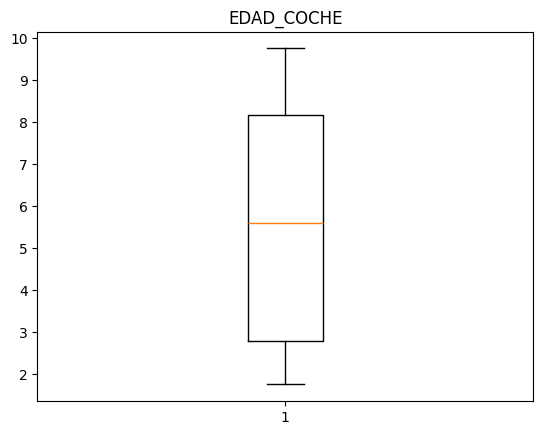

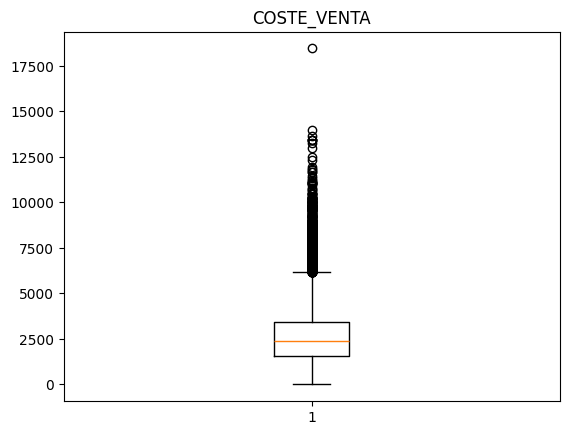

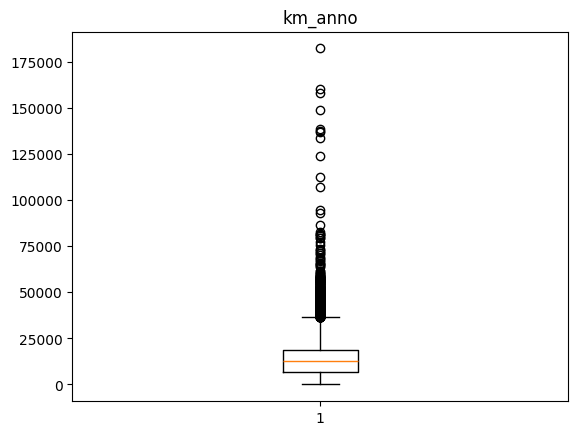

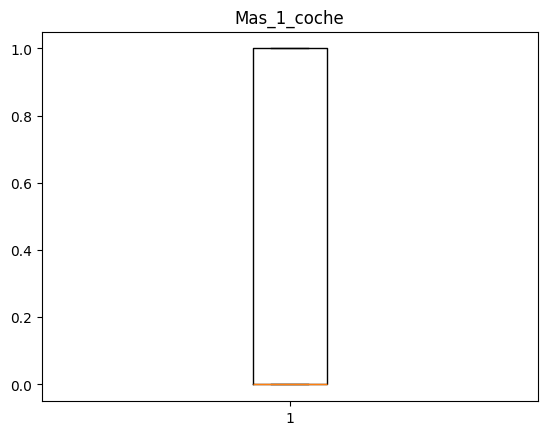

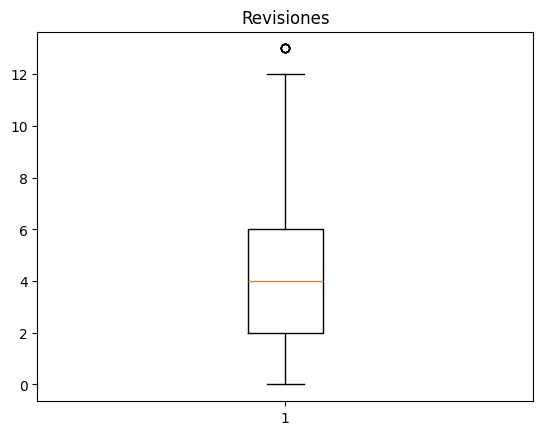

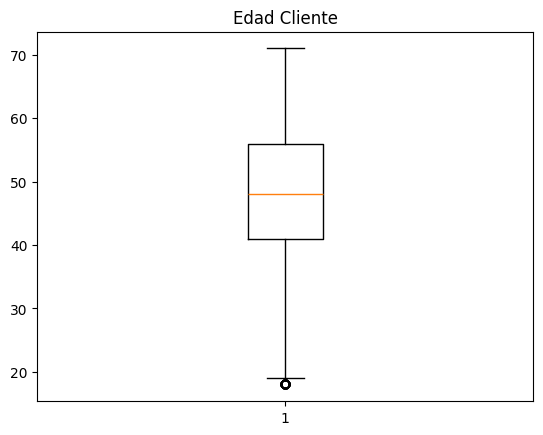

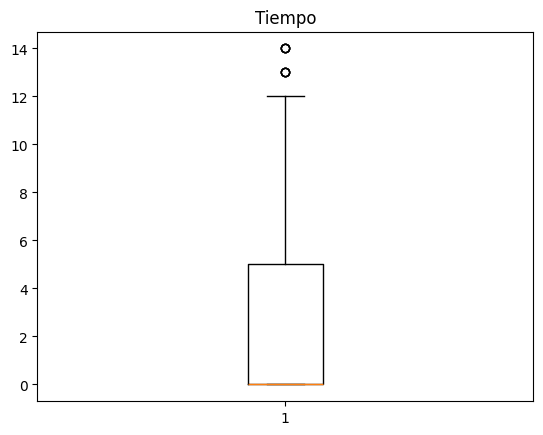

In [47]:
# Diagrama de caja para identificar outliers
for i in df.columns:
    if df[i].dtype == 'int64' or df[i].dtype == 'float64':
        plt.title(i)
        plt.boxplot(x=df[i])
        plt.show()

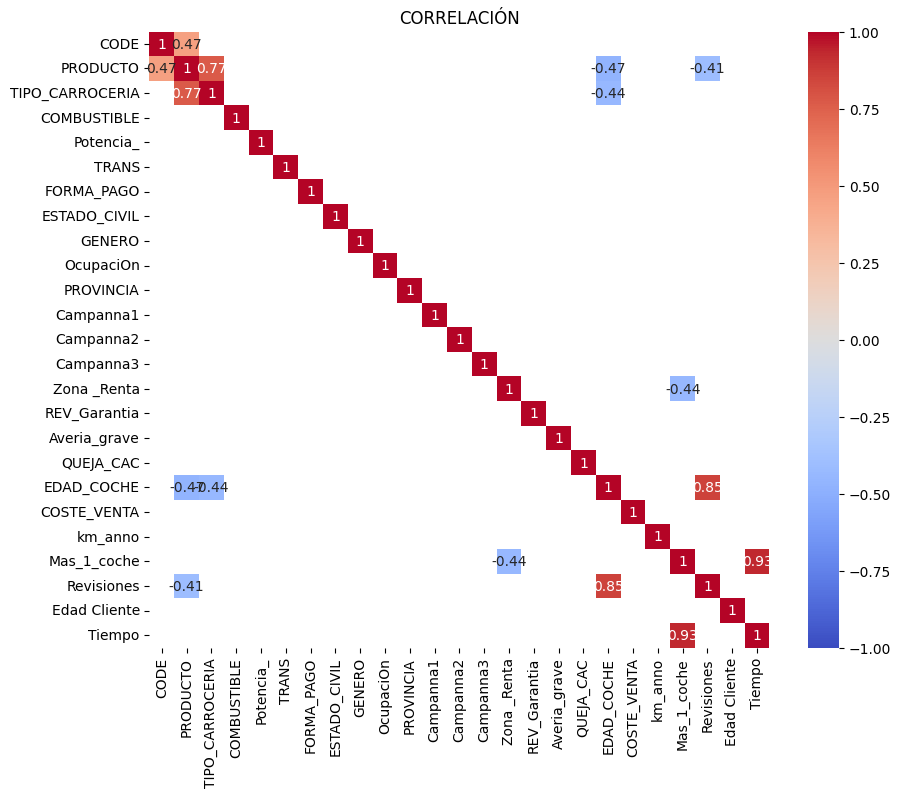

In [48]:
# Calcular la matriz de correlación
corr = df.corr()

# Aplicar un filtro para mostrar solo las correlaciones superiores a 0.6 o inferiores a -0.6
filtered_corr = corr[(corr > 0.4) | (corr < -0.4)]

# Crear el heatmap solo con las correlaciones filtradas
plt.figure(figsize=(10, 8))
plt.title('CORRELACIÓN')
sns.heatmap(filtered_corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.show()

## Cosas importantes

Hemos notado que al ser nuestra variable objetivo el comprar mas de un coche (Mas_1_coche), que es importante fijarse en las variables que más relacionadas están con ella.

Despues de un estudio de un mapa de correlación hemos deliverado que las más relacionadas son el tiempo (0.93) y la zona de renta (0.44).

Lo suyo sería establecer una nueva variable que guarde esta relación, donde la zona de renta poderemos más en función de que zona de renta tiene, y que también pondere más cuanto más tiempo haya entre compras, porque así hay más probabilidad de que necesite un coche nuevo.

## Quiero ver si podemos sacar algun patrón de las campañas con la zona renta

In [51]:
onehot = OneHotEncoder()

column_transformer = ColumnTransformer(
    [('onehot', onehot, ['Zona _Renta'])], remainder='passthrough'),
column_transformer.fit_transform(df)

AttributeError: 'tuple' object has no attribute 'fit_transform'